# Brent Brison: 19 March 2024: ASTR 19 Final Project

In [1]:
import numpy as np
import sep

In [2]:
# additional setup for reading the test image and displaying plots\

from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [3]:
# read image into standard 2-d numpy array

with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits") as hdul:
    data = hdul[0].data

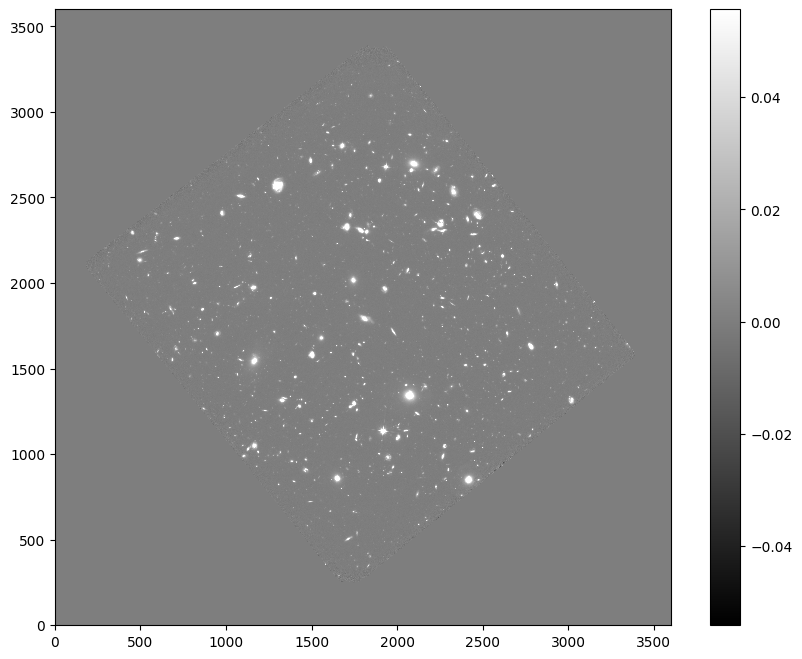

In [4]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('original_f105w.png')

In [5]:
data = data.byteswap().newbyteorder()
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [6]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

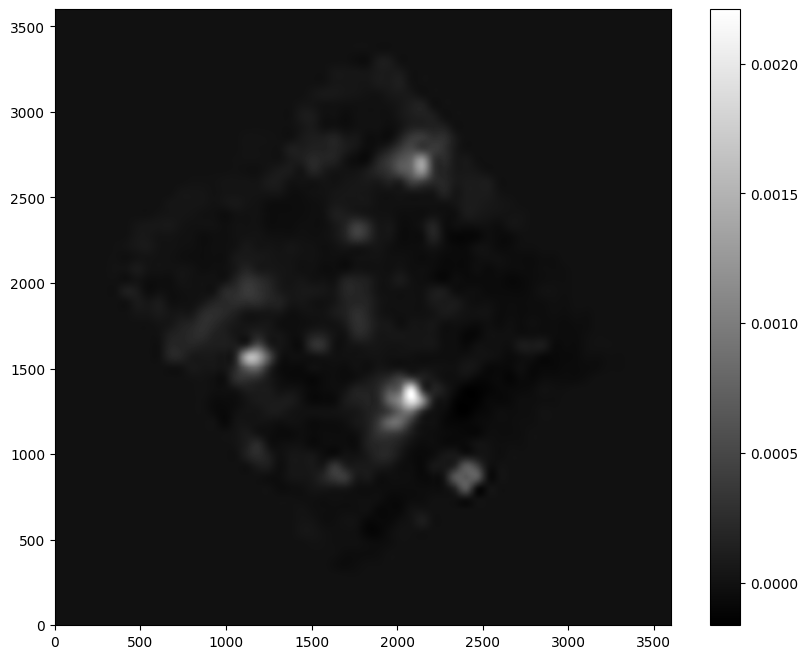

In [7]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('f105w_bkgImage.png')

In [8]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

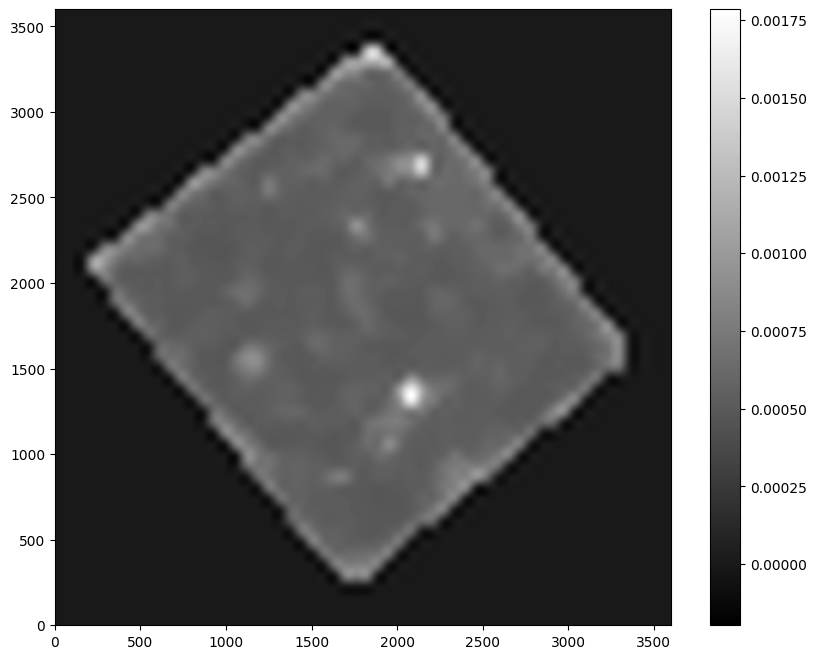

In [9]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('f105w_bkgNoise.png')

In [10]:
# subtract the background
data_sub = data - bkg

In [11]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

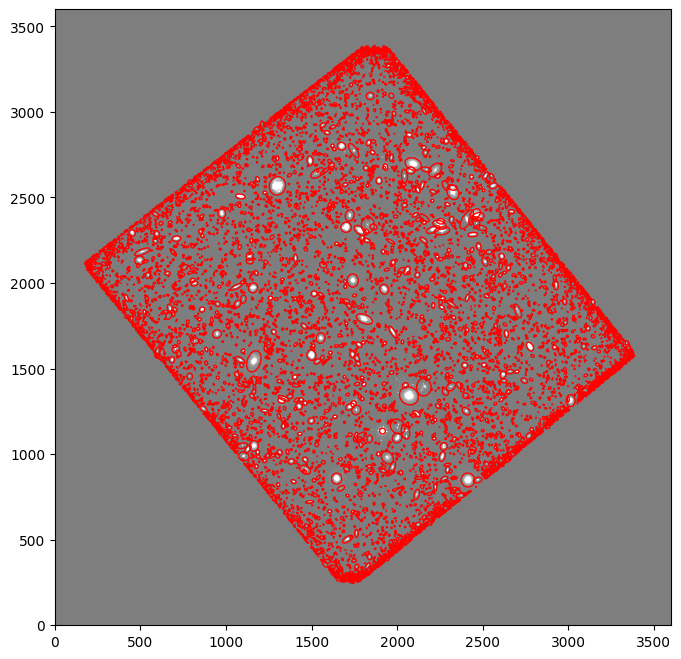

In [12]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('f105w_bkgEllipses.png')

In [13]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

8640 objects found.


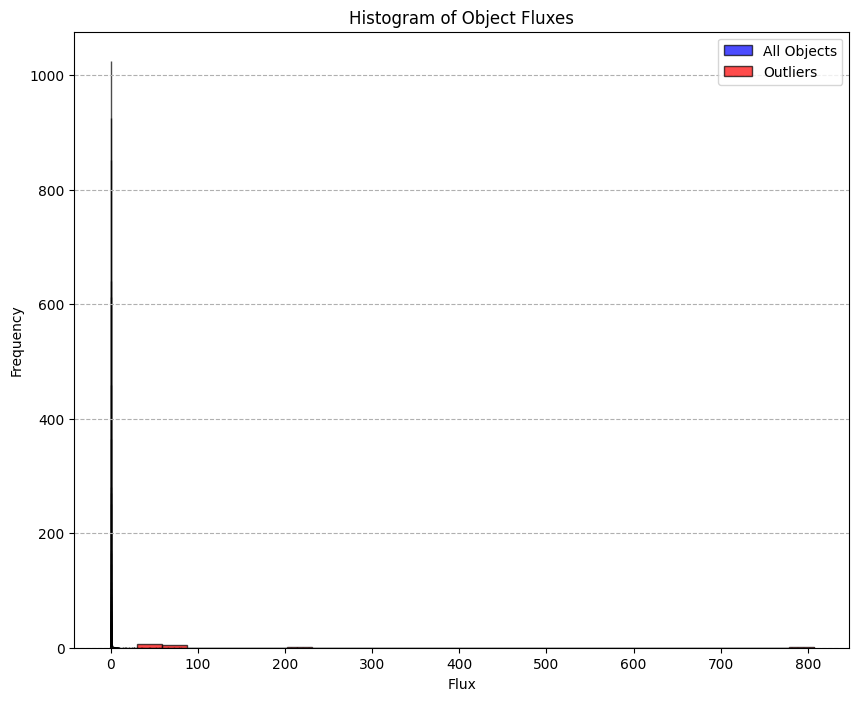

Average flux of objects: 0.36186200072018937
Median flux of objects: 0.03095655805023853
Standard deviation for all fluxes: 9.24352784277779.

Largest outlier in the distribution is object 2066 located at image coordinates x=1914.2549094866436, y=1134.3164850725645
at 87.29734310292692 standard deviations from the mean flux. (Flux of 807.2972835731507)


<Figure size 1000x800 with 0 Axes>

In [14]:
# How many sources do you find? Histogram their fluxes.
print(len(objects), "objects found.")


fluxMean = np.mean(flux)
fluxSTD = np.std(flux)
outliers = []
threshold = 3
for x in range(len(flux)):
    z_score = (flux[x] - fluxMean) / fluxSTD
    if abs(z_score) > threshold:
        # append object number to outliers so we can access in our flux 
        outliers.append(x)

# Create array of outlier fluxes to plot.
outlierFluxes = []
for x in range(len(outliers)):
    # appending flux of object # 'outliers[x]' 
    # which represents the source number of an outlier object in our flux data set
    outlierFluxes.append(flux[outliers[x]])
    
# All Object Sources
plt.hist(flux, bins='auto', color='blue', edgecolor='black', alpha=0.7, label='All Objects')

# Outliers Subset
plt.hist(outlierFluxes,bins='auto',color='red', edgecolor='black', alpha=0.7, label='Outliers')

plt.grid(axis='y',linestyle='--')
plt.title('Histogram of Object Fluxes')
plt.xlabel('Flux')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.savefig('Object_Flux_Histogram.png')

# mean, median, and standard deviation of the distribution of fluxes. 
# What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean? 
print("Average flux of objects:",fluxMean)
print("Median flux of objects:",np.median(flux))
print(f"Standard deviation for all fluxes: {np.std(flux)}.\n")
furthestSTD = 0.0
largestOutlier = 0
for i in range(len(outlierFluxes)):
    # Find largest outlier based on distance of flux STD from mean flux
    distFromSTD = ( (outlierFluxes[i] - fluxMean) / fluxSTD)
    if ( (distFromSTD) > furthestSTD):
        furthestSTD = distFromSTD
        largestOutlier = outliers[i] # source number of largest outlier

    # Print statements for outlier fluxes and # of STD from the mean flux for each outlier.
    '''
    print(f"Outlier found @ object {outliers[i]}. Flux: {flux[outliers[i]]}")
    print("# Of STD from mean flux:", ((flux[outliers[i]] - np.mean(flux))/ np.std(flux)),"\n")
    '''
    
print(f"Largest outlier in the distribution is object {largestOutlier} located at image coordinates x={objects['x'][largestOutlier]}, y={objects['y'][largestOutlier]}\n" 
        f"at {furthestSTD} standard deviations from the mean flux. (Flux of {flux[largestOutlier]})")




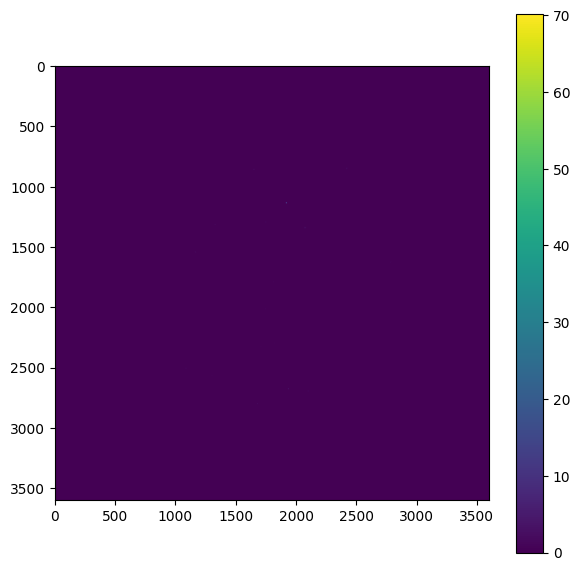

In [15]:
# make a 3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.

import matplotlib.image as mpimg
import matplotlib.colors as mpcolors

with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits") as hdul:
    f160w_IMG_data = hdul[0].data

with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits") as hdul:
    f125w_IMG_data = hdul[0].data

with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits") as hdul:
    f105w_IMG_data = hdul[0].data

# Taking a initial look at our data.
f = plt.figure(figsize=(7,7))
plt.imshow(f125w_IMG_data)
plt.colorbar()

Function to rescale our image in order so faint objects are still visible.

In [16]:
def rescale_image(data):
    # copy the data to avoid accidentaly overwriting it
    pdata_tmp = data.copy()

    # compute the mean value over all data, excluding NaN (Not a Number)
    m = np.nanmean(pdata_tmp)

    # if lower than vpmin, apply vpmin
    # if higher than vpmax, apply vpmax
    vpmin = 0.5*m
    vpmax = 100*m
    pdata_tmp[pdata_tmp<vpmin] = vpmin
    pdata_tmp[pdata_tmp>vpmax] = vpmax

    #apply logscale
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp

Function using the fits library in order to quickly plot our now rescaled data.

In [17]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp = rescale_image(data)
    plt.imshow(pdata_tmp)

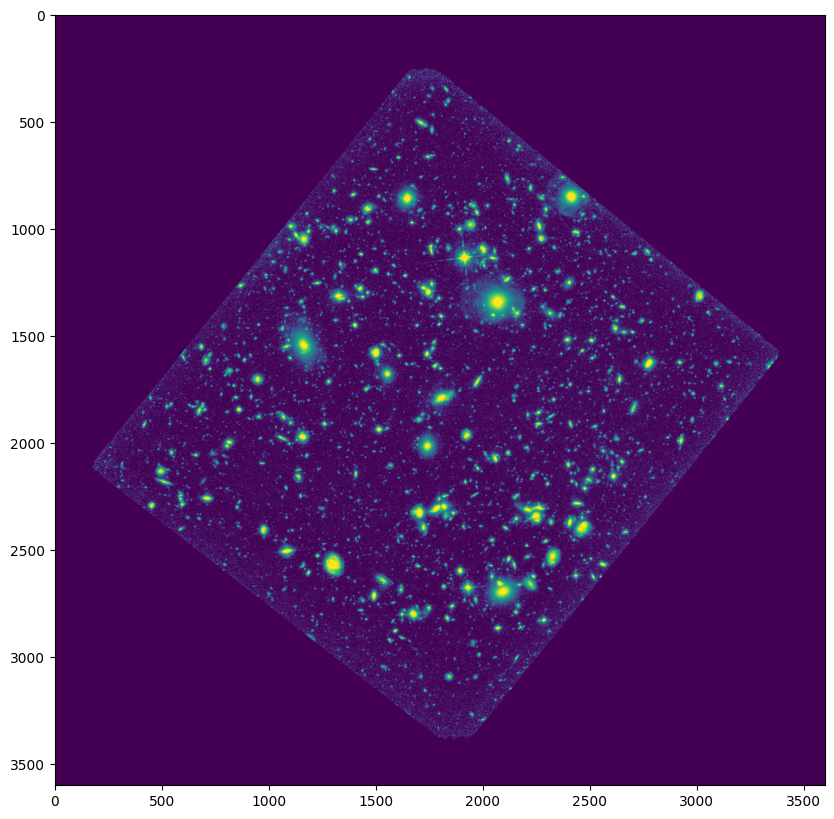

In [18]:
# quick look at our rescaled data
fits_quicklook(f125w_IMG_data)

In [19]:
# Rescale our 3 images
f160w_IMG_data_res = rescale_image(f160w_IMG_data)
f125w_IMG_data_res = rescale_image(f125w_IMG_data)
f105w_IMG_data_res = rescale_image(f105w_IMG_data)

combined_IMG_data = np.zeros((f160w_IMG_data.shape[0],f160w_IMG_data.shape[1],3))
combined_IMG_data[:,:,0] = f160w_IMG_data
combined_IMG_data[:,:,1] = f125w_IMG_data
combined_IMG_data[:,:,2] = f105w_IMG_data

combined_IMG_data = rescale_image(combined_IMG_data)

We now create a function in order to map our array values to [0,1] range.

In [20]:
def remap(data):
    # copy our data
    pdata_tmp = data.copy()

    dmin = pdata_tmp.min()
    dmax = pdata_tmp.max()
    return (pdata_tmp - dmin) / (dmax - dmin)

Moving forward, we must create an RGB image that is of dimensions ny x ny x 3. Each of our images having to be R, G, or B.

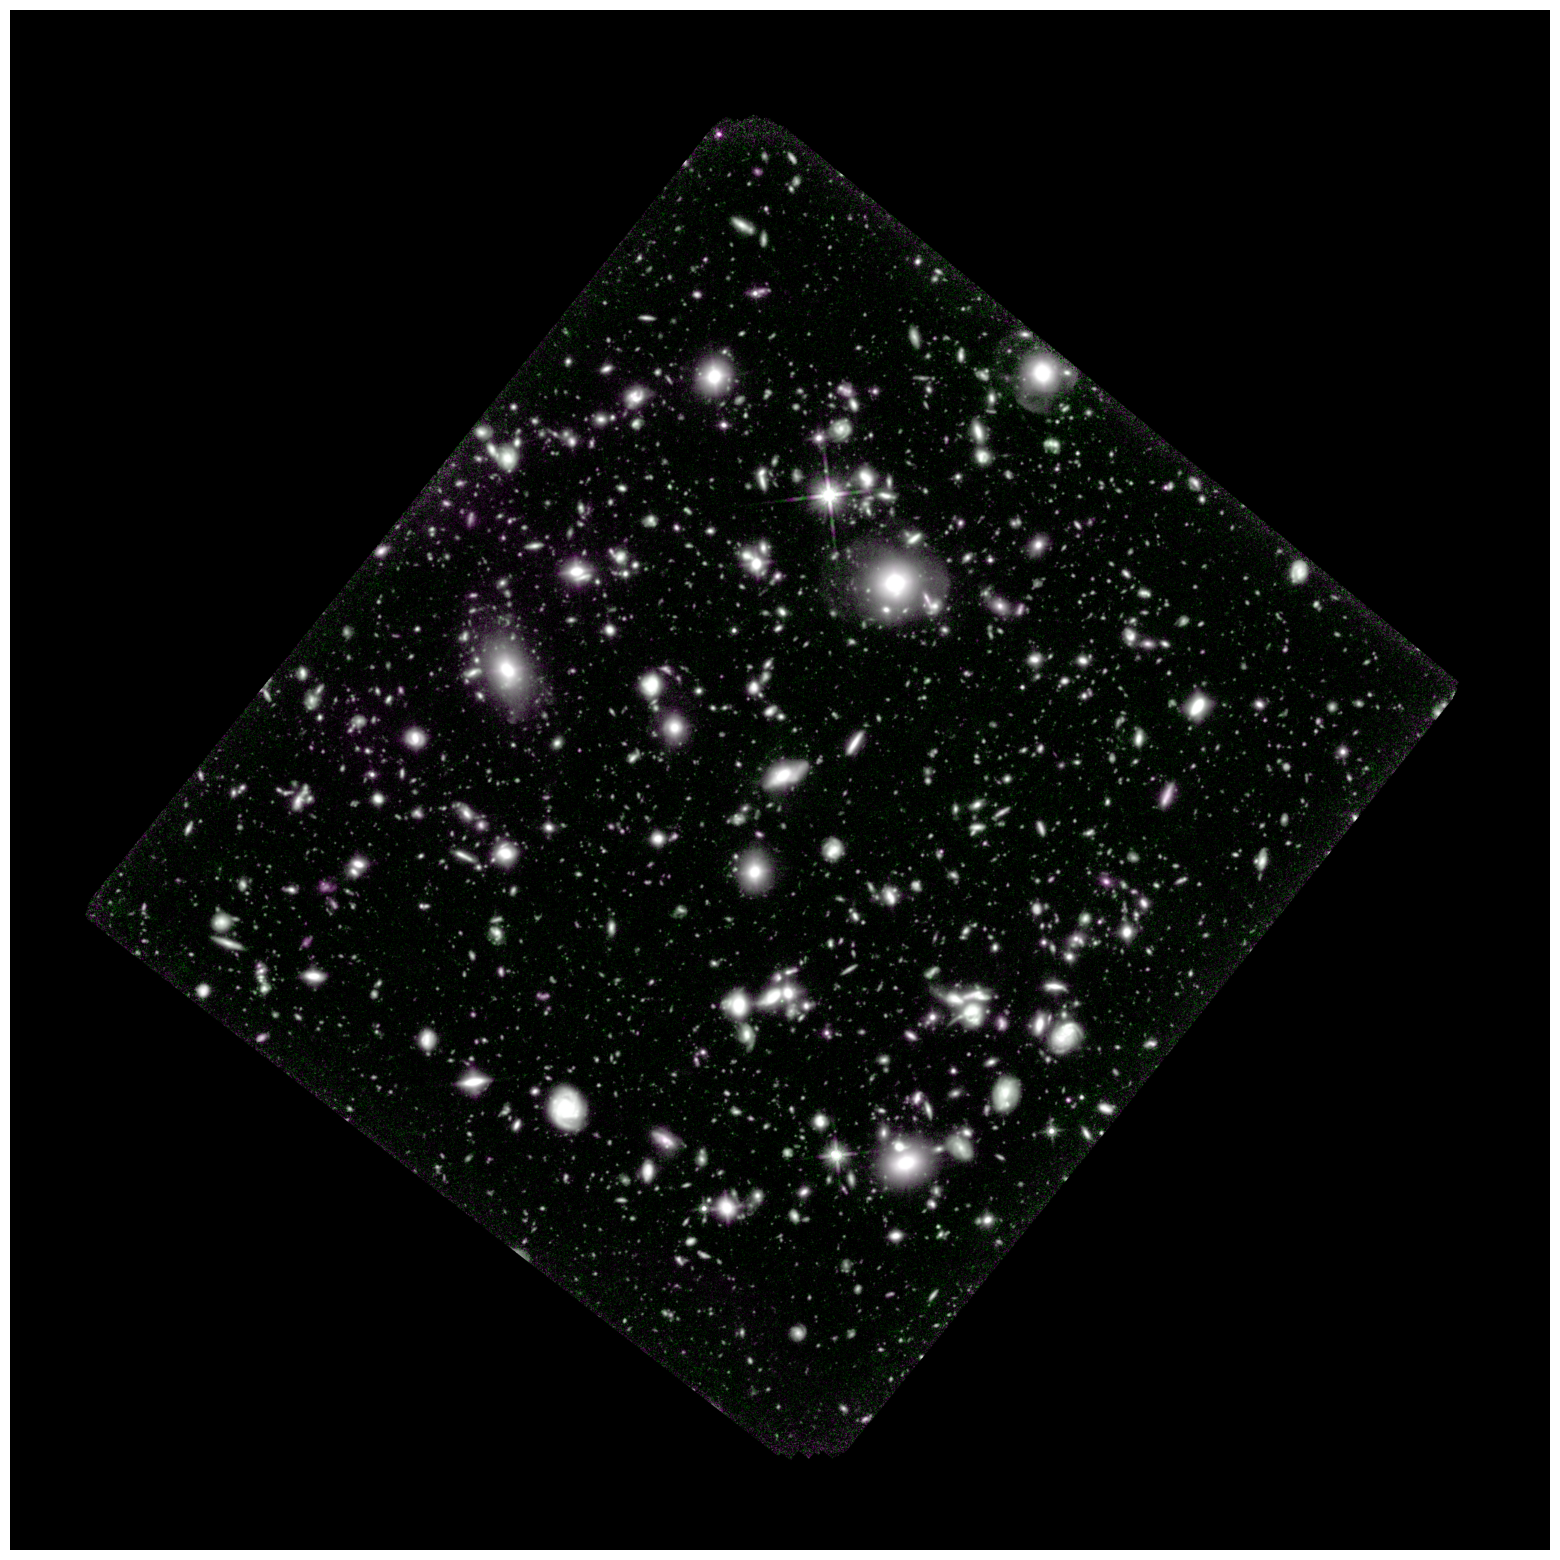

In [21]:
rgb_image = np.zeros((f160w_IMG_data.shape[0], f160w_IMG_data.shape[1], 3))
rgb_image = remap(combined_IMG_data)

# Plot our RGB IMG
f,ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb_image)
plt.savefig('UDF_3_Color_False.png')